In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

stats = pd.read_csv("data/afl/stats.csv")
players = pd.read_csv("data/afl/players.csv")
games = pd.read_csv("data/afl/games.csv")

player=players["displayName"]=="Franklin, Lance"

# display a list of players
#player=input ([players["displayName"]])

"""
display (players.columns)
display (games.columns)
display (stats.columns)
display(stats)
"""

# merge on playerId
merge_playerStats = players.merge(stats, how="inner", on=["playerId","displayName"])
display ("Player Stats ====================================")
display (merge_playerStats)


# create GamePlayer Stats data frame and merge on gameId and playerId
merge_GamePlayerStats = merge_playerStats.merge(games, how="inner", on=["gameId",'year','round'])
display ("Game player Stats ====================================")
display (merge_GamePlayerStats.columns)
display ("====================================")
display (player)



'Player Stats ===================================='

,playerId,displayName,height,weight,dob,position,origin,gameId,team,year,...,Brownlow Votes,Contested Possessions,Uncontested Possessions,Contested Marks,Marks Inside 50,One Percenters,Bounces,Goal Assists,% Played,Subs
0,2021661124,"Berry, Sam",181,81,12-Feb-2002,"Midfield, Forward",Gippsland Power,2021R104,Adelaide,2021,...,0,4,5,0,0,0,0,1,80,-
1,2021661124,"Berry, Sam",181,81,12-Feb-2002,"Midfield, Forward",Gippsland Power,2021R203,Adelaide,2021,...,0,5,2,0,1,1,0,0,64,-
2,2021661124,"Berry, Sam",181,81,12-Feb-2002,"Midfield, Forward",Gippsland Power,2021R303,Adelaide,2021,...,0,6,6,1,1,2,0,0,77,-
3,2021661124,"Berry, Sam",181,81,12-Feb-2002,"Midfield, Forward",Gippsland Power,2021R407,Adelaide,2021,...,0,3,7,0,0,2,0,1,66,-
4,2021661124,"Berry, Sam",181,81,12-Feb-2002,"Midfield, Forward",Gippsland Power,2021R507,Adelaide,2021,...,0,7,6,0,0,3,0,0,71,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89465,2011838967,"Skinner, Zephaniah",189,79,27-Jun-1989,Forward,-,2012R1902,Western Bulldogs,2012,...,0,4,4,0,0,2,0,2,73,-
89466,2011838967,"Skinner, Zephaniah",189,79,27-Jun-1989,Forward,-,2012R2008,Western Bulldogs,2012,...,0,6,6,0,2,0,0,0,75,-
89467,2011838967,"Skinner, Zephaniah",189,79,27-Jun-1989,Forward,-,2012R2108,Western Bulldogs,2012,...,0,4,4,1,1,1,1,0,74,-
89468,2011838967,"Skinner, Zephaniah",189,79,27-Jun-1989,Forward,-,2012R2207,Western Bulldogs,2012,...,0,9,8,2,1,1,0,1,73,-


'Game player Stats ===================================='

Index(['playerId', 'displayName', 'height', 'weight', 'dob', 'position',
       'origin', 'gameId', 'team', 'year', 'round', 'gameNumber', 'Disposals',
       'Kicks', 'Marks', 'Handballs', 'Goals', 'Behinds', 'Hit Outs',
       'Tackles', 'Rebounds', 'Inside 50s', 'Clearances', 'Clangers', 'Frees',
       'Frees Against', 'Brownlow Votes', 'Contested Possessions',
       'Uncontested Possessions', 'Contested Marks', 'Marks Inside 50',
       'One Percenters', 'Bounces', 'Goal Assists', '% Played', 'Subs', 'date',
       'venue', 'startTime', 'attendance', 'homeTeam', 'homeTeamScore',
       'awayTeam', 'awayTeamScore', 'rainfall'],
      dtype='object')

'===================================='

0       False
1       False
2       False
3       False
4       False
        ...  
1490    False
1491    False
1492    False
1493    False
1494    False
Name: displayName, Length: 1495, dtype: bool

To Do
plot their accumlation of goals over time. The x-axis should be the number of games played and the y-axis should be the number of goals accumulated. Thus we expect to see a line that monotonically increases, but in what way will depend on the player's career.

'Franklin, Lance'

,gameId,year,round,gameNumber,playerId,displayName,Goals,venue
45114,2012R103,2012,R1,143,2005708162,"Franklin, Lance",5,M.C.G.
45115,2012R209,2012,R2,144,2005708162,"Franklin, Lance",2,M.C.G.
45116,2012R308,2012,R3,145,2005708162,"Franklin, Lance",3,M.C.G.
45117,2012R405,2012,R4,146,2005708162,"Franklin, Lance",1,Subiaco
45118,2012R507,2012,R5,147,2005708162,"Franklin, Lance",0,York Park
...,...,...,...,...,...,...,...,...
44970,2021R1907,2021,R19,314,2005708162,"Franklin, Lance",2,Carrara
44971,2021R2007,2021,R20,315,2005708162,"Franklin, Lance",2,M.C.G.
44972,2021R2105,2021,R21,316,2005708162,"Franklin, Lance",1,Docklands
44973,2021R2303,2021,R23,317,2005708162,"Franklin, Lance",6,Docklands


45114      5
45115      7
45116     10
45117     11
45118     11
        ... 
44970    532
44971    534
44972    535
44973    541
44974    544
Name: Goals, Length: 176, dtype: int64

'Papley, Tom'

,gameId,year,round,gameNumber,playerId,displayName,Goals,venue
46431,2016R105,2016,R1,1,2016803212,"Papley, Tom",3,S.C.G.
46432,2016R209,2016,R2,2,2016803212,"Papley, Tom",2,Docklands
46433,2016R304,2016,R3,3,2016803212,"Papley, Tom",1,S.C.G.
46434,2016R406,2016,R4,4,2016803212,"Papley, Tom",0,Adelaide Oval
46435,2016R502,2016,R5,5,2016803212,"Papley, Tom",2,S.C.G.
...,...,...,...,...,...,...,...,...
46347,2021R2007,2021,R20,118,2016803212,"Papley, Tom",4,M.C.G.
46348,2021R2105,2021,R21,119,2016803212,"Papley, Tom",2,Docklands
46349,2021R2206,2021,R22,120,2016803212,"Papley, Tom",2,Docklands
46350,2021R2303,2021,R23,121,2016803212,"Papley, Tom",3,Docklands


46431      3
46432      5
46433      6
46434      6
46435      8
        ... 
46347    180
46348    182
46349    184
46350    187
46351    189
Name: Goals, Length: 122, dtype: int64

'Mumford, Shane'

,gameId,year,round,gameNumber,playerId,displayName,Goals,venue
24833,2012R101,2012,R1,62,2008773839,"Mumford, Shane",1,Stadium Australia
24834,2012R303,2012,R3,63,2008773839,"Mumford, Shane",1,Football Park
24835,2012R1008,2012,R10,64,2008773839,"Mumford, Shane",0,S.C.G.
24836,2012R1104,2012,R11,65,2008773839,"Mumford, Shane",1,Docklands
24837,2012R1301,2012,R13,66,2008773839,"Mumford, Shane",0,S.C.G.
...,...,...,...,...,...,...,...,...
24704,2021R1909,2021,R19,212,2008773839,"Mumford, Shane",1,Carrara
24705,2021R2009,2021,R20,213,2008773839,"Mumford, Shane",1,Docklands
24706,2021R2201,2021,R22,214,2008773839,"Mumford, Shane",1,Docklands
24707,2021EF01,2021,EF,215,2008773839,"Mumford, Shane",0,York Park


24833     1
24834     2
24835     2
24836     3
24837     3
         ..
24704    36
24705    37
24706    38
24707    38
24708    39
Name: Goals, Length: 155, dtype: int64

'Hooker, Cale'

,gameId,year,round,gameNumber,playerId,displayName,Goals,venue
11969,2012R107,2012,R1,50,2008723099,"Hooker, Cale",0,Docklands
11970,2012R402,2012,R4,51,2008723099,"Hooker, Cale",0,M.C.G.
11971,2012R501,2012,R5,52,2008723099,"Hooker, Cale",0,M.C.G.
11972,2012R602,2012,R6,53,2008723099,"Hooker, Cale",0,Docklands
11973,2012R706,2012,R7,54,2008723099,"Hooker, Cale",0,Docklands
...,...,...,...,...,...,...,...,...
11829,2021R1506,2021,R15,215,2008723099,"Hooker, Cale",1,M.C.G.
11830,2021R1602,2021,R16,216,2008723099,"Hooker, Cale",0,Kardinia Park
11831,2021R1702,2021,R17,217,2008723099,"Hooker, Cale",1,Docklands
11832,2021R1806,2021,R18,218,2008723099,"Hooker, Cale",1,Carrara


11969      0
11970      0
11971      0
11972      0
11973      0
        ... 
11829    114
11830    114
11831    115
11832    116
11833    117
Name: Goals, Length: 170, dtype: int64

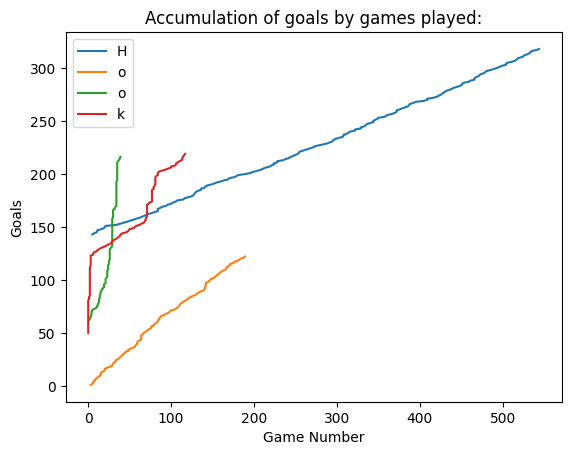

In [43]:
# mask data  based on playerId 
playerStats=merge_GamePlayerStats.loc[merge_GamePlayerStats["playerId"]==2005708162]


#playerName=playerStats.iloc[0,1]
#display(playerName)

playerStats=playerStats.sort_values(by='gameNumber')

#df.set_index(["gameNumber"])
#df.columns = df.iloc[0]


"""
display (playerStats[["gameId","year","round","gameNumber","playerId", "displayName","Goals","venue"]])

x=playerStats["gameNumber"]
y=playerStats["Goals"].cumsum()

display (x)

plt.plot (y,x)
plt.title ("Accumulation of goals by games played:" + playerName)
plt.xlabel("Game Number")
plt.ylabel("Goals")
plt.show
"""

players=["Franklin, Lance","Papley, Tom","Mumford, Shane","Hooker, Cale"]

for  player in players:
    playerStats=merge_GamePlayerStats.loc[merge_GamePlayerStats["displayName"]==player]
    playerStats=playerStats.sort_values(by='gameNumber')
    x=playerStats["gameNumber"]
    y=playerStats["Goals"].cumsum()

    #display data
    display(player)
    display (playerStats[["gameId","year","round","gameNumber","playerId", "displayName","Goals","venue"]])
    display(y)
    
    plt.plot (y,x)
    plt.legend(player)
    plt.title ("Accumulation of goals by games played:")
    plt.xlabel("Game Number")
    plt.ylabel("Goals")
    plt.show